# Proton Energy Loss Correction using GEMC
 
FD proton inbending: [APSApril/ProtonMomentumCorrection3.ipynb](APSApril/ProtonMomentumCorrection3.ipynb)

pipeline update: root -> pkl

## Load Libs


In [1]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares
import numpy

In [2]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

## outbending dvcsgen
### Load data

In [121]:
job3111_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/3111_CD_0.pkl")
job3111_1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/3111_CD_1.pkl")
job3111_2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/3111_CD_2.pkl")
job3111_3 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/3111_CD_3.pkl")
job3111_4 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/3111_CD_4.pkl")
job3111_5 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/3111_CD_5.pkl")
job3111_6 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/3111_CD_6.pkl")
job3111_7 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/3111_CD_7.pkl")
job3111_8 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/3111_CD_8.pkl")
job3111_9 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/3111_CD_9.pkl")
job3111_10 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/3111_CD_10.pkl")
job3111_11 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/3111_CD_11.pkl")
job3111_12 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/3111_CD_12.pkl")
job3111_13 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/3111_CD_13.pkl")
job3111_14 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/3111_CD_14.pkl")
job3111_15 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/3111_CD_15.pkl")
job3111_16 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/3111_CD_16.pkl")
job3111_17 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/3111_CD_17.pkl")
job3111_18 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/3111_CD_18.pkl")
job3111_19 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/3111_CD_19.pkl")

In [122]:
job3111 = pd.concat([globals()['job3111_'+str(i)] for i in range(20)])

### FD momentum correction

In [123]:
job3111FD = job3111[job3111.Psector<7]

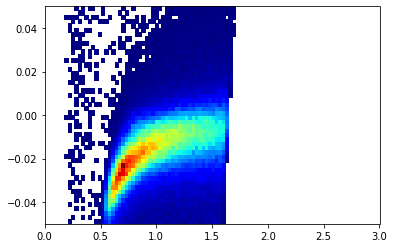

In [8]:
plt.hist2d(job3111FD.Pp, job3111FD.Pp - job3111FD.GenPp, bins = [np.linspace(0, 3, 101), np.linspace(-0.05, 0.05 , 51)], cmap = cmap, cmin =1)
plt.show()

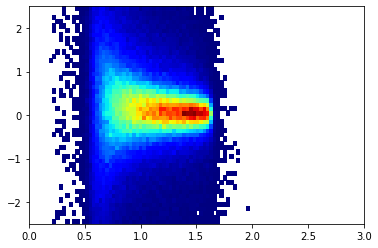

In [9]:
plt.hist2d(job3111FD.Pp, job3111FD.Ptheta - job3111FD.GenPtheta, bins = [np.linspace(0, 3, 101), np.linspace(-2.5, 2.5 , 51)], cmap = cmap, cmin =1)
plt.show()

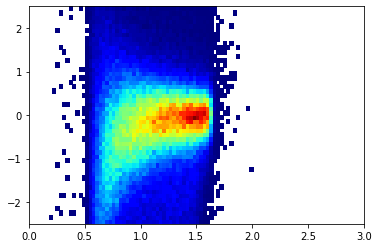

In [10]:
plt.hist2d(job3111FD.Pp, job3111FD.Pphi - job3111FD.GenPphi, bins = [np.linspace(0, 3, 101), np.linspace(-2.5, 2.5 , 51)], cmap = cmap, cmin =1)
plt.show()

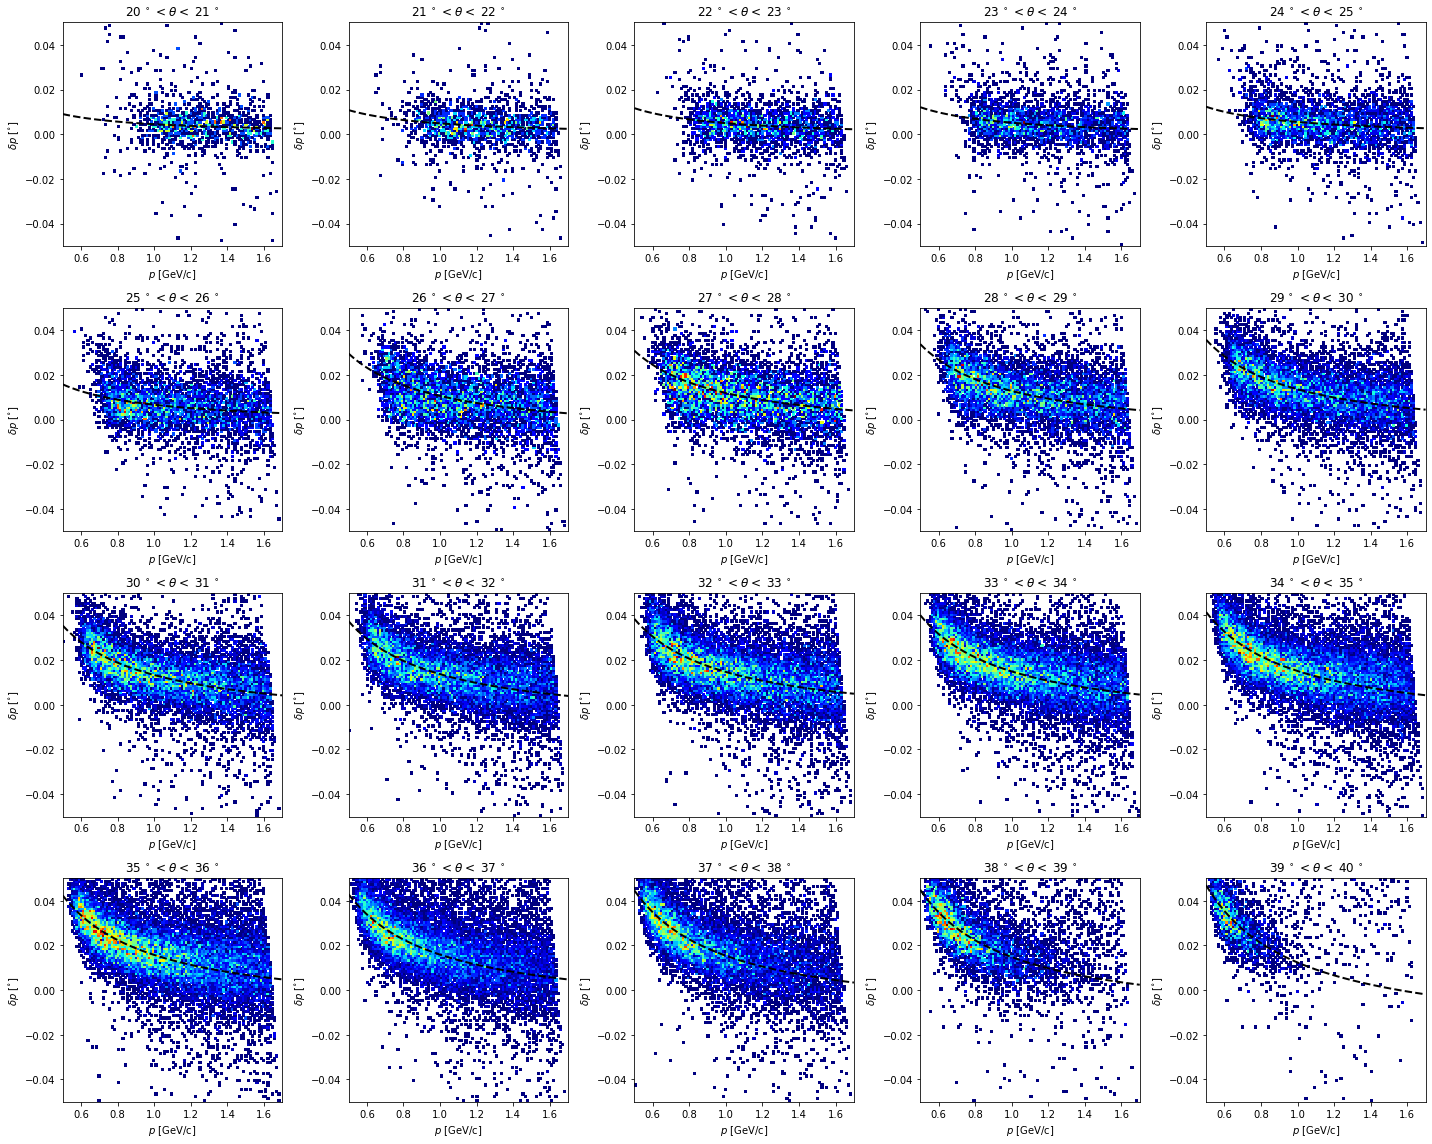

In [32]:
fig, axs = plt.subplots(4,5, figsize=(20,16))
for row in range(4):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (job3111FD.Ptheta >= ind+20) & (job3111FD.Ptheta < ind+21)
        axs[row, col].hist2d(job3111FD.loc[thetaCond, "Pp"], job3111FD.loc[thetaCond, "GenPp"] - job3111FD.loc[thetaCond, "Pp"], bins = [np.linspace(0.5, 1.7, 101), np.linspace(-0.05, 0.05, 101)], cmap = cmap, cmin =1)
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.5, 1.7, 51), correction(param, np.linspace(0.5, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+degree+"]")
        axs[row, col].set_title(str(ind+20)+" "+degree + r" $<\theta<$ " + str(ind+21)+" "+degree)
plt.tight_layout()
plt.show()
# plt.savefig("correction_p_result.pdf")

In [12]:
def fun(x, t, y):
    return x[0] + x[1]/t - y

def correction(x, t):
    x0, x1 = x
    return x0 + x1/t

In [25]:
params_p = []
uncertainties_p = []
# loss = []
for i in range(20):
#     if ind<3:
#         x0 = [-0.00497,  0.00989223]
#     else:
#         x0 = [-0.02097534,  0.03317596]

    #from previous fit
#     x0s = [[-0.00954028,  0.01301059], [-0.00707975,  0.01093971], [-0.00438814,  0.00959533], [-0.01717612,  0.02865886], [-0.02014798,  0.0338319 ], [-0.03188756,  0.04206616]]
#     x0 = x0s[ind//2]

    x0s = [[-4.80389058e-05,  4.53222098e-03],
           [-1.23041956e-03,  6.05807042e-03],
           [-1.76384255e-03,  6.72228344e-03],
           [-1.88736661e-03,  7.02802014e-03],
           [-1.79354781e-03,  7.24121971e-03],
           [-2.90571633e-03,  9.42541929e-03],
           [-9.47461186e-03,  1.98311802e-02],
           [-8.07962821e-03,  1.98069365e-02],
           [-9.23283528e-03,  2.19080106e-02],
           [-9.56769814e-03,  2.29519214e-02],
           [-9.68958476e-03,  2.28616792e-02],
           [-1.10693927e-02,  2.45928549e-02],
           [-1.03538529e-02,  2.48101827e-02],
           [-1.12320275e-02,  2.59453728e-02],
           [-1.24223334e-02,  2.73036576e-02],
           [-1.19610320e-02,  2.74316186e-02],
           [-1.25053015e-02,  2.80233161e-02],
           [-1.49314572e-02,  2.99888234e-02],
           [-1.60389360e-02,  3.06035474e-02],
           [-2.36705524e-02,  3.55724193e-02]]
    x0 = x0s[ind]
    
    thetaCond = (job3111FD.Ptheta >= i+20) & (job3111FD.Ptheta < i+21)
    dfi = copy(job3111FD.loc[thetaCond, ["Pp", "GenPp"]])
    dffit = copy(dfi[np.abs(dfi["GenPp"]-dfi["Pp"]-correction(x0, dfi["Pp"]))<0.01])
    for i in range (0, 5):
        res_lsq = least_squares(fun, x0, args=(dffit["Pp"], (dffit["GenPp"]-dffit["Pp"])))    
        dffit = copy(dfi[np.abs(dfi["GenPp"]-dfi["Pp"]-correction(res_lsq.x, dfi["Pp"]))<0.01])
        x0 = res_lsq.x
    
    params_p.append(res_lsq.x)
    
    # uncertainty
    # https://github.com/scipy/scipy/blob/2526df72e5d4ca8bad6e2f4b3cbdfbc33e805865/scipy/optimize/minpack.py#L739
    _, s, VT = np.linalg.svd(res_lsq.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res_lsq.jac.shape) * s[0]
    s = s[s > threshold]
    VT = VT[:s.size]
    pcov = np.dot(VT.T / s**2, VT)
    s_sq = np.sum((dfi["GenPp"]-dfi["Pp"]-correction(res_lsq.x, dfi["Pp"]))**2) / (len(dfi) - len(x0))
    pcov = pcov * s_sq
    uncertainties_p.append(np.sqrt(np.diag(pcov)))

In [26]:
params_p = np.array(params_p)
consts_p = params_p[:, 0]
coeffs_p = params_p[:, 1]

uncertainties_p = np.array(uncertainties_p)
consts_uncertainties_p = uncertainties_p[:, 0]
coeffs_uncertainties_p = uncertainties_p[:, 1]

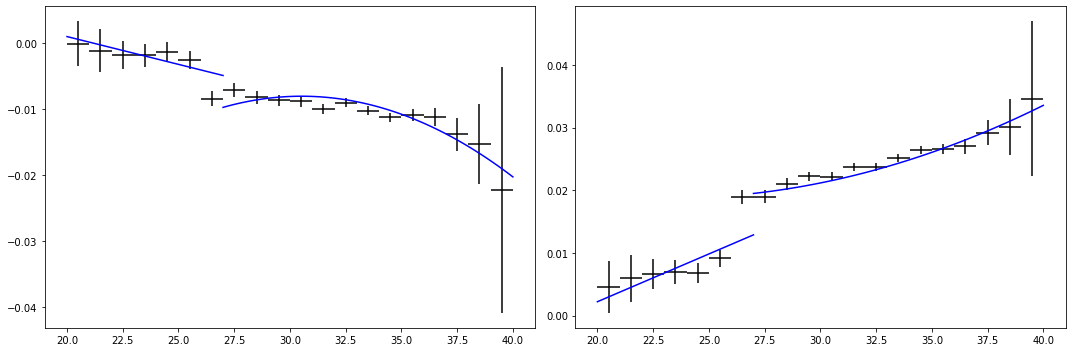

In [31]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].errorbar(np.linspace(0, 19, 20)+20.5, consts_p, xerr= 0.5, yerr = consts_uncertainties_p, color='k', linestyle = '')
ax[1].errorbar(np.linspace(0, 19, 20)+20.5, coeffs_p, xerr= 0.5, yerr = coeffs_uncertainties_p, color='k', linestyle = '')
ax[0].plot(np.linspace(20, 27, 101), correction2(param1_p, np.linspace(20, 26, 101)), color = 'b')
ax[0].plot(np.linspace(27, 40, 101), correction3(param3_p, np.linspace(26, 40, 101)), color = 'b')

ax[1].plot(np.linspace(20, 27, 101), correction2(param2_p, np.linspace(20, 26, 101)), color = 'b')
ax[1].plot(np.linspace(27, 40, 101), correction3(param4_p, np.linspace(26, 40, 101)), color = 'b')

plt.tight_layout()
plt.show()
# plt.savefig("correction_phi.pdf")

In [28]:
def fun2(x, t, y):
    return x[0] + x[1]*t- y
def correction2(x, t):
    x0, x1 = x
    return x0 + x1*t

def fun3(x, t, y):
    return x[0] + x[1]*t + x[2]*t*t - y
def correction3(x, t):
    x0, x1, x2 = x
    return x0 + x1*t + x2*t*t

In [29]:
x = np.linspace(0, 19, 20)+20.5
x1 = x[0:7]
consts1_p = consts_p[0:7]
coeffs1_p = coeffs_p[0:7]
x2 = x[7:]
consts2_p = consts_p[7:]
coeffs2_p = coeffs_p[7:]

In [30]:
res_lsq = least_squares(fun2, [0.005, -0.002], args=(x1, consts1_p))    
param1_p = res_lsq.x
res_lsq = least_squares(fun2, [0, 0], args=(x1, coeffs1_p))    
param2_p = res_lsq.x

res_lsq = least_squares(fun3, [0, 0, 0], args=(x2, consts2_p))    
param3_p = res_lsq.x
res_lsq = least_squares(fun3, [0, 0, 0], args=(x2, coeffs2_p))    
param4_p = res_lsq.x

In [33]:
print(params_p)
print(param1_p, param2_p, param3_p, param4_p)

[[-4.80389055e-05  4.53222098e-03]
 [-1.10539698e-03  5.95132589e-03]
 [-1.73611621e-03  6.69651435e-03]
 [-1.79229868e-03  6.94552444e-03]
 [-1.34471410e-03  6.82124899e-03]
 [-2.51599480e-03  9.12229697e-03]
 [-8.40993885e-03  1.89695271e-02]
 [-7.10347423e-03  1.89545964e-02]
 [-8.17298557e-03  2.09602439e-02]
 [-8.65830349e-03  2.21934433e-02]
 [-8.79967286e-03  2.21370098e-02]
 [-9.97172453e-03  2.37044382e-02]
 [-8.99862822e-03  2.37170664e-02]
 [-1.02394834e-02  2.51877035e-02]
 [-1.12389442e-02  2.63827311e-02]
 [-1.08638123e-02  2.66152195e-02]
 [-1.11291909e-02  2.70203808e-02]
 [-1.38115044e-02  2.92097105e-02]
 [-1.53157734e-02  3.00974809e-02]
 [-2.22607563e-02  3.46245532e-02]]
[ 0.02067157 -0.0009827 ] [-0.03334437  0.00177781] [-0.11216694  0.0069912  -0.00011733] [ 4.02797945e-02 -1.97220505e-03  4.50918200e-05]


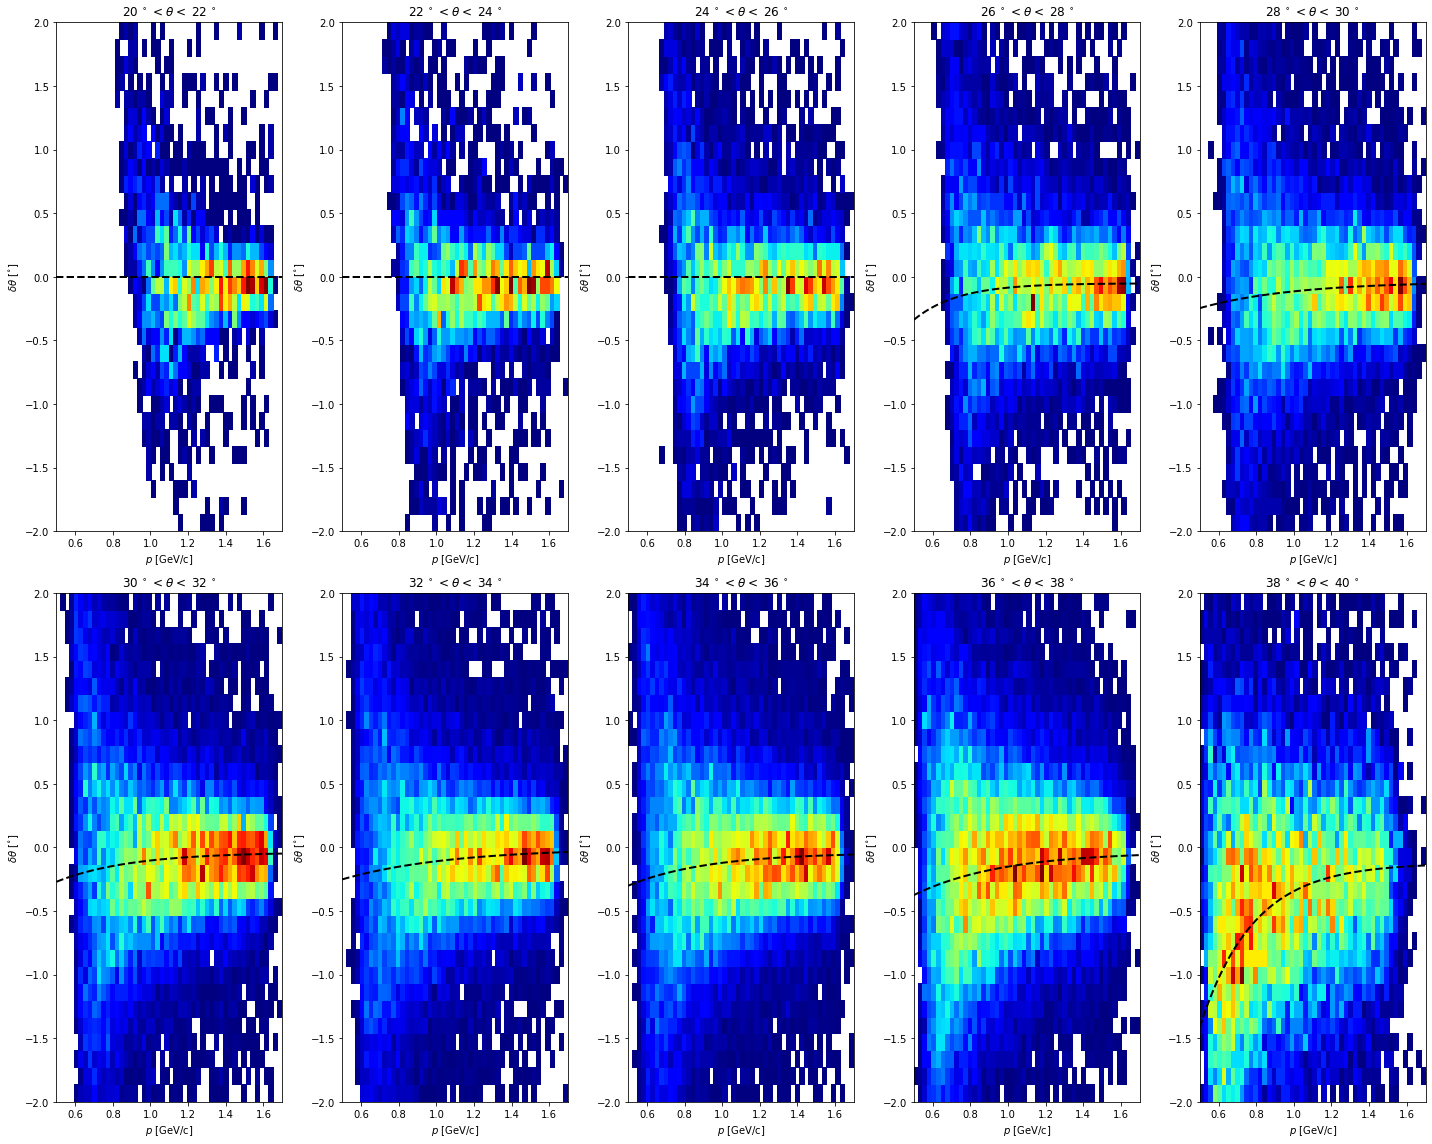

In [81]:
fig, axs = plt.subplots(2,5, figsize=(20,16))
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (job3111FD.Ptheta >= 2*ind+20) & (job3111FD.Ptheta < 2*ind+22)
        axs[row, col].hist2d(job3111FD.loc[thetaCond, "Pp"], job3111FD.loc[thetaCond, "GenPtheta"] - job3111FD.loc[thetaCond, "Ptheta"], bins = [np.linspace(0.5, 1.7, 51), np.linspace(-2, 2, 31)], cmap = cmap, cmin =1)
        param = params_theta[ind]
#         param = [0, -8, -3 ]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.5, 1.7, 101), correction4([0, -2, -3], np.linspace(0.5, 1.7, 101)), color='k', linewidth=2, linestyle='--')
        axs[row, col].plot(np.linspace(0.5, 1.7, 101), correction4(param, np.linspace(0.5, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+20)+" "+degree + r" $<\theta<$ " + str(2*ind+22)+" "+degree)
plt.tight_layout()
plt.show()
# plt.savefig("correction_p_result.pdf")

In [34]:
def fun4(x, t, y):
    return x[0] + x[1]*np.exp(x[2]*t) - y
def correction4(x, t):
    x0, x1, x2 = x
    return x0 + x1*np.exp(x2*t)

In [64]:
params_theta = []
uncertainties_theta = []
# loss = []
for ind in range(10):
    if ind<3:
        params_theta.append([0, 0, 0])
        uncertainties_theta.append([0, 0, 0])
        continue
    elif ind < 6:
        x0 = [-3.37945354*0.01, -7.87068171*0.1, -2.43124589]
    elif ind == 6:
        x0 =  [-0.00329367, -0.60879046, -1.68497436]
    elif ind == 7:
        x0 =  [-0.0115623 , -0.61905967, -1.70336114]
    elif ind == 8 :
        x0 = [-0.04952365, -1.5933815 , -2.79516533]
    elif ind == 9:
        x0 = [-0.16080697, -8.59241295, -3.85634824]

    thetaCond = (job3111FD.Ptheta >= 2*ind+20) & (job3111FD.Ptheta < 2*ind+22)
    dfi = copy(job3111FD.loc[thetaCond, ["Pp", "GenPtheta", "Ptheta"]])
    dffit = copy(dfi[np.abs(dfi["GenPtheta"]-dfi["Ptheta"]-correction4(x0, dfi["Pp"]))<.2])
    for i in range (0, 5):
        res_lsq = least_squares(fun4, x0, args=(dffit["Pp"], (dffit["GenPtheta"]-dffit["Ptheta"])))    
        dffit = copy(dfi[np.abs(dfi["GenPtheta"]-dfi["Ptheta"]-correction4(res_lsq.x, dfi["Pp"]))<.2])
        x0 = res_lsq.x
    
    params_theta.append(res_lsq.x)
    
    # uncertainty
    # https://github.com/scipy/scipy/blob/2526df72e5d4ca8bad6e2f4b3cbdfbc33e805865/scipy/optimize/minpack.py#L739
    _, s, VT = np.linalg.svd(res_lsq.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res_lsq.jac.shape) * s[0]
    s = s[s > threshold]
    VT = VT[:s.size]
    pcov = np.dot(VT.T / s**2, VT)
    s_sq = np.sum((dfi["GenPtheta"]-dfi["Ptheta"]-correction4(res_lsq.x, dfi["Pp"]))**2) / (len(dfi) - len(x0))
    pcov = pcov * s_sq
    uncertainties_theta.append(np.sqrt(np.diag(pcov)))

# params_theta[0] = params_theta[3]
# params_theta[1] = params_theta[3]
# params_theta[2] = params_theta[3]

# uncertainties_theta[0] = uncertainties_theta[3]
# uncertainties_theta[1] = uncertainties_theta[3]
# uncertainties_theta[2] = uncertainties_theta[3]

In [65]:
params_theta = np.array(params_theta)
consts_theta = params_theta[:, 0]
coeffs_theta = params_theta[:, 1]
coeffs2_theta = params_theta[:, 2]

uncertainties_theta = np.array(uncertainties_theta)
consts_uncertainties_theta = uncertainties_theta[:, 0]
coeffs_uncertainties_theta = uncertainties_theta[:, 1]
coeffs2_uncertainties_theta = uncertainties_theta[:, 2]

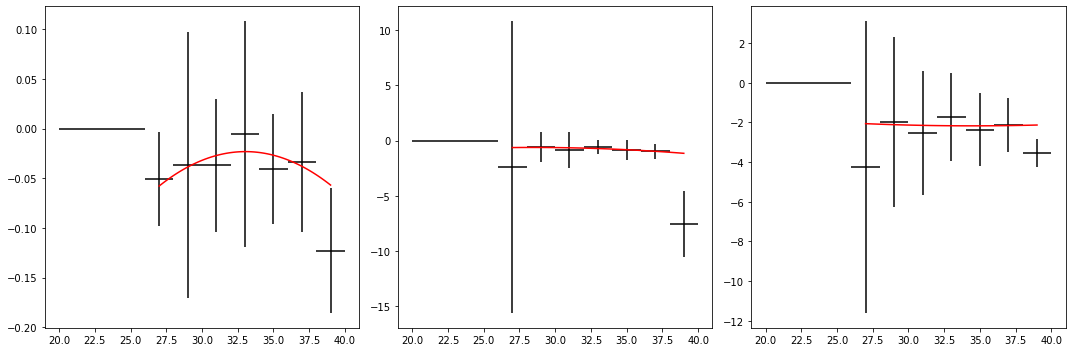

In [83]:
# fig, ax = plt.subplots(1,3, figsize=(15,5))
# x = np.linspace(0, 9,10)*2+20
# # ax[0].errorbar(x[:-2], consts_theta[:-2], xerr= 1, yerr = consts_uncertainties_theta[:-2], color='k', linestyle = '')
# # ax[1].errorbar(x[:-2], coeffs_theta[:-2], xerr= 1, yerr = coeffs_uncertainties_theta[:-2], color='k', linestyle = '')
# # ax[2].errorbar(x[:-2], coeffs2_theta[:-2], xerr= 1, yerr = coeffs2_uncertainties_theta[:-2], color='k', linestyle = '')
# ax[0].errorbar(x, consts_theta, xerr= 1, yerr = consts_uncertainties_theta, color='k', linestyle = '')
# ax[1].errorbar(x, coeffs_theta, xerr= 1, yerr = coeffs_uncertainties_theta, color='k', linestyle = '')
# ax[2].errorbar(x, coeffs2_theta, xerr= 1, yerr = coeffs2_uncertainties_theta, color='k', linestyle = '')
# # ax[0].set_ylim([-1, 4])
# plt.tight_layout()
# plt.show()
# plt.savefig("correction_phi.pdf")

fig, ax = plt.subplots(1,3, figsize=(15,5))
x = np.linspace(0, 9,10)*2+21
ax[0].errorbar(x[:], consts_theta[:], xerr= 1, yerr = consts_uncertainties_theta[:], color='k', linestyle = '')
# x1 = np.linspace(19.5, 27, 101)
x2 = np.linspace(27, 39, 101)
# ax[0].plot(x1, correction3(param1_theta, x1), color = 'b')
ax[0].plot(x2, correction3(param4_theta, x2), color = 'r')
ax[1].errorbar(x[:], coeffs_theta[:], xerr= 1, yerr = coeffs_uncertainties_theta[:], color='k', linestyle = '')
# ax[1].plot(x1, correction3(param2_theta, x1), color = 'b')
ax[1].plot(x2, correction3(param5_theta, x2), color = 'r')
ax[2].errorbar(x[:], coeffs2_theta[:], xerr= 1, yerr = coeffs2_uncertainties_theta[:], color='k', linestyle = '')
# ax[2].plot(x1, correction3(param3_theta, x1), color = 'b')
ax[2].plot(x2, correction3(param6_theta, x2), color = 'r')
# ax[0].set_ylim([-1, 4])
plt.tight_layout()
plt.show()
# plt.savefig("correction_phi.pdf")

In [67]:
params_theta

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-5.07624696e-02, -2.40252819e+00, -4.25109886e+00],
       [-3.66605792e-02, -5.65656662e-01, -1.98795658e+00],
       [-3.70570211e-02, -8.29029315e-01, -2.53805819e+00],
       [-5.10778822e-03, -5.85073887e-01, -1.73245362e+00],
       [-4.07680505e-02, -8.46580112e-01, -2.35649695e+00],
       [-3.39667149e-02, -9.90305372e-01, -2.13639914e+00],
       [-1.23044632e-01, -7.52117236e+00, -3.52825441e+00]])

In [79]:
x = np.linspace(0, 9, 10)*2+21
# x1 = x[3:6]
# consts1_theta = consts_theta[3:6]
# coeffs11_theta = coeffs_theta[3:6]
# coeffs21_theta = coeffs2_theta[3:6]
x2 = x[[4,5,6,7,8]]
consts2_theta = consts_theta[[4,5,6,7,8]]
coeffs12_theta = coeffs_theta[[4,5,6,7,8]]
coeffs22_theta = coeffs2_theta[[4,5,6,7,8]]

# res_lsq = least_squares(fun3, [0, 0, 0], args=(x1, consts1_theta))    
# param1_theta = res_lsq.x
# res_lsq = least_squares(fun3, [0, 0, 0], args=(x1, coeffs11_theta))    
# param2_theta = res_lsq.x
# res_lsq = least_squares(fun3, [0, 0, 0], args=(x1, coeffs21_theta))    
# param3_theta = res_lsq.x

res_lsq = least_squares(fun3, [0, 0, 0], args=(x2, consts2_theta))    
param4_theta = res_lsq.x
res_lsq = least_squares(fun3, [0, 0, 0], args=(x2, coeffs12_theta))    
param5_theta = res_lsq.x
res_lsq = least_squares(fun3, [0, 0, 0], args=(x2, coeffs22_theta))    
param6_theta = res_lsq.x

In [76]:
param4_theta

array([-1.79343987e+00,  1.05559096e-01, -1.57174358e-03])

In [75]:
param5_theta

array([-2.74344526e+01,  1.61037587e+00, -2.42300381e-02])

In [77]:
param6_theta

array([-4.52983842e+01,  2.51745350e+00, -3.65942178e-02])

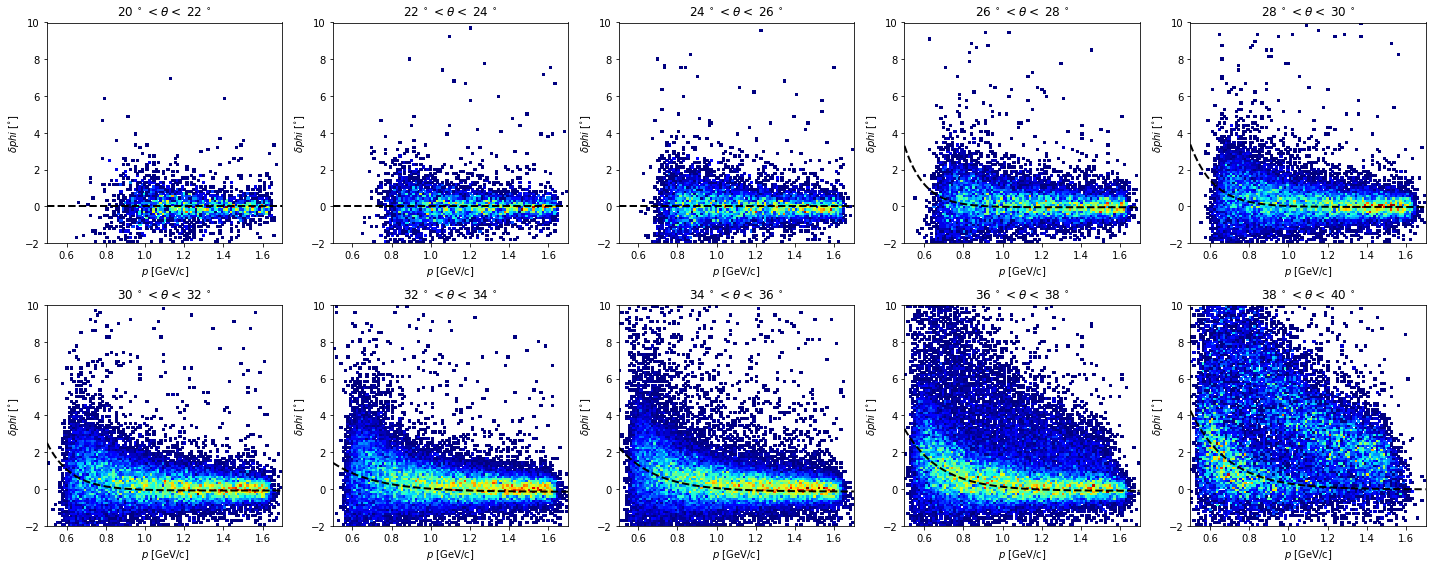

In [111]:
fig, axs = plt.subplots(2,5, figsize=(20,8))
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (job3111FD.Ptheta >= 2*ind+20) & (job3111FD.Ptheta < 2*ind+22)
        axs[row, col].hist2d(job3111FD.loc[thetaCond, "Pp"], job3111FD.loc[thetaCond, "GenPphi"] - job3111FD.loc[thetaCond, "Pphi"], bins = [np.linspace(0.5, 1.7, 101), np.linspace(-2, 10, 101)], cmap = cmap, cmin =1)
        param = params_phi[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.5, 1.7, 101), correction4(param, np.linspace(0.5, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+20)+" "+degree + r" $<\theta<$ " + str(2*ind+22)+" "+degree)
plt.tight_layout()
plt.show()
# plt.savefig("correction_p_result.pdf")

In [112]:
print(params_phi, param4_phi, param5_phi, param6_phi)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-4.46088658e-02  4.33541265e+02 -9.73156650e+00]
 [-2.98674960e-02  2.20821755e+02 -8.34801132e+00]
 [-8.32576643e-02  1.52607208e+02 -8.14932375e+00]
 [-1.52399478e-01  1.49377347e+01 -4.48908521e+00]
 [-1.39334029e-01  3.11100630e+01 -5.11491762e+00]
 [-1.00282474e-01  5.16828959e+01 -5.46132007e+00]
 [-2.24918574e-02  5.56319490e+01 -5.12646023e+00]] [ 5.37967179e+00 -3.24630795e-01  4.76947696e-03] [ 7.25038499e+03 -4.13586911e+02  5.91815405e+00] [-1.24626261e+02  6.77668728e+00 -9.60045129e-02]


In [100]:
params_phi = []
uncertainties_phi = []
# loss = []
for ind in range(10):
    if ind<3:
        params_phi.append([0, 0, 0])
        uncertainties_phi.append([0, 0, 0])
        continue
    elif ind < 6:
        x0 = [-3.37945354*0.01, -7.87068171*0.1, -2.43124589]
    elif ind == 6:
        x0 =  [-0.15017355, 13.35037767, -4.41746064]
    elif ind == 7:
        x0 =  [-0.13555584, 32.90577153, -5.24234189]
    elif ind == 8 :
        x0 = [-0.11003422, 24.33044321, -4.68777278]
    elif ind == 9:
        x0 = [-0.11003422, 24.33044321, -4.68777278]

    phiCond = (job3111FD.Pphi >= 2*ind+20) & (job3111FD.Pphi < 2*ind+22)
    dfi = copy(job3111FD.loc[phiCond, ["Pp", "GenPphi", "Pphi"]])
    cut = 1
    if ind == 9:
        cut = 2
    dffit = copy(dfi[np.abs(dfi["GenPphi"]-dfi["Pphi"]-correction4(x0, dfi["Pp"]))<cut])
    for i in range (0, 5):
        res_lsq = least_squares(fun4, x0, args=(dffit["Pp"], (dffit["GenPphi"]-dffit["Pphi"])))    
        dffit = copy(dfi[np.abs(dfi["GenPphi"]-dfi["Pphi"]-correction4(res_lsq.x, dfi["Pp"]))<cut])
        x0 = res_lsq.x
    
    params_phi.append(res_lsq.x)
    
    # uncertainty
    # https://github.com/scipy/scipy/blob/2526df72e5d4ca8bad6e2f4b3cbdfbc33e805865/scipy/optimize/minpack.py#L739
    _, s, VT = np.linalg.svd(res_lsq.jac, full_matrices=False)
    threshold = np.finfo(float).eps * max(res_lsq.jac.shape) * s[0]
    s = s[s > threshold]
    VT = VT[:s.size]
    pcov = np.dot(VT.T / s**2, VT)
    s_sq = np.sum((dfi["GenPphi"]-dfi["Pphi"]-correction4(res_lsq.x, dfi["Pp"]))**2) / (len(dfi) - len(x0))
    pcov = pcov * s_sq
    uncertainties_phi.append(np.sqrt(np.diag(pcov)))

# params_phi[0] = params_phi[3]
# params_phi[1] = params_phi[3]
# params_phi[2] = params_phi[3]

# uncertainties_phi[0] = uncertainties_phi[3]
# uncertainties_phi[1] = uncertainties_phi[3]
# uncertainties_phi[2] = uncertainties_phi[3]

In [101]:
params_phi = np.array(params_phi)
consts_phi = params_phi[:, 0]
coeffs_phi = params_phi[:, 1]
coeffs2_phi = params_phi[:, 2]

uncertainties_phi = np.array(uncertainties_phi)
consts_uncertainties_phi = uncertainties_phi[:, 0]
coeffs_uncertainties_phi = uncertainties_phi[:, 1]
coeffs2_uncertainties_phi = uncertainties_phi[:, 2]

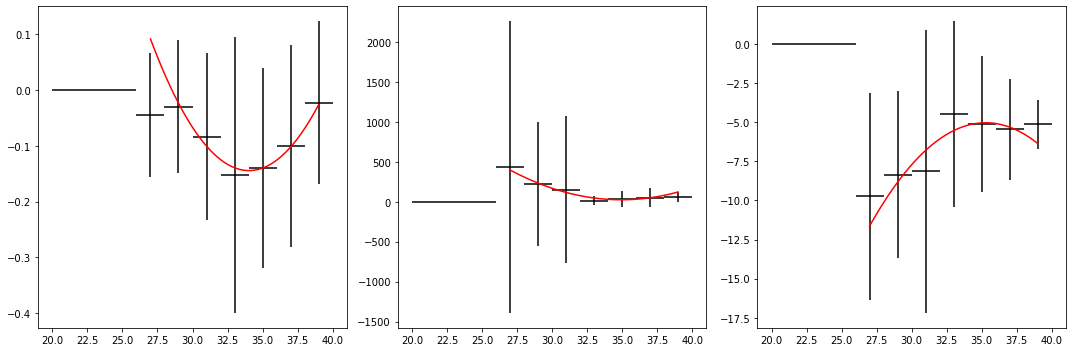

In [110]:
# fig, ax = plt.subplots(1,3, figsize=(15,5))
# x = np.linspace(0, 9,10)*2+20
# # ax[0].errorbar(x[:-2], consts_phi[:-2], xerr= 1, yerr = consts_uncertainties_phi[:-2], color='k', linestyle = '')
# # ax[1].errorbar(x[:-2], coeffs_phi[:-2], xerr= 1, yerr = coeffs_uncertainties_phi[:-2], color='k', linestyle = '')
# # ax[2].errorbar(x[:-2], coeffs2_phi[:-2], xerr= 1, yerr = coeffs2_uncertainties_phi[:-2], color='k', linestyle = '')
# ax[0].errorbar(x, consts_phi, xerr= 1, yerr = consts_uncertainties_phi, color='k', linestyle = '')
# ax[1].errorbar(x, coeffs_phi, xerr= 1, yerr = coeffs_uncertainties_phi, color='k', linestyle = '')
# ax[2].errorbar(x, coeffs2_phi, xerr= 1, yerr = coeffs2_uncertainties_phi, color='k', linestyle = '')
# # ax[0].set_ylim([-1, 4])
# plt.tight_layout()
# plt.show()
# plt.savefig("correction_phi.pdf")

fig, ax = plt.subplots(1,3, figsize=(15,5))
x = np.linspace(0, 9,10)*2+21
ax[0].errorbar(x[:], consts_phi[:], xerr= 1, yerr = consts_uncertainties_phi[:], color='k', linestyle = '')
# x1 = np.linspace(19.5, 27, 101)
x2 = np.linspace(27, 39, 101)
# ax[0].plot(x1, correction3(param1_phi, x1), color = 'b')
ax[0].plot(x2, correction3(param4_phi, x2), color = 'r')
ax[1].errorbar(x[:], coeffs_phi[:], xerr= 1, yerr = coeffs_uncertainties_phi[:], color='k', linestyle = '')
# ax[1].plot(x1, correction3(param2_phi, x1), color = 'b')
ax[1].plot(x2, correction3(param5_phi, x2), color = 'r')
ax[2].errorbar(x[:], coeffs2_phi[:], xerr= 1, yerr = coeffs2_uncertainties_phi[:], color='k', linestyle = '')
# ax[2].plot(x1, correction3(param3_phi, x1), color = 'b')
ax[2].plot(x2, correction3(param6_phi, x2), color = 'r')
# ax[0].set_ylim([-1, 4])
plt.tight_layout()
plt.show()
# plt.savefig("correction_phi.pdf")

In [109]:
x = np.linspace(0, 9, 10)*2+21
# x1 = x[3:6]
# consts1_phi = consts_phi[3:6]
# coeffs11_phi = coeffs_phi[3:6]
# coeffs21_phi = coeffs2_phi[3:6]
x2 = x[4:-1]
consts2_phi = consts_phi[4:-1]
coeffs12_phi = coeffs_phi[4:-1]
coeffs22_phi = coeffs2_phi[4:-1]

# res_lsq = least_squares(fun3, [0, 0, 0], args=(x1, consts1_phi))    
# param1_phi = res_lsq.x
# res_lsq = least_squares(fun3, [0, 0, 0], args=(x1, coeffs11_phi))    
# param2_phi = res_lsq.x
# res_lsq = least_squares(fun3, [0, 0, 0], args=(x1, coeffs21_phi))    
# param3_phi = res_lsq.x

res_lsq = least_squares(fun3, [0, 0, 0], args=(x2, consts2_phi))    
param4_phi = res_lsq.x
res_lsq = least_squares(fun3, [0, 0, 0], args=(x2, coeffs12_phi))    
param5_phi = res_lsq.x
res_lsq = least_squares(fun3, [0, 0, 0], args=(x2, coeffs22_phi))    
param6_phi = res_lsq.x

In [91]:
params_phi

[[0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 array([-4.46088658e-02,  4.33541265e+02, -9.73156650e+00]),
 array([-2.98674960e-02,  2.20821755e+02, -8.34801132e+00]),
 array([-8.32576643e-02,  1.52607208e+02, -8.14932375e+00]),
 array([-0.15017355, 13.35037767, -4.41746064]),
 array([-0.13555584, 32.90577153, -5.24234189]),
 array([-0.11003422, 24.33044321, -4.68777278]),
 array([ 7.01963348e-02, -1.78829723e+14, -5.48275948e+01])]

In [114]:
print(param4_phi, param5_phi, param6_phi)

[ 5.37967179e+00 -3.24630795e-01  4.76947696e-03] [ 7.25038499e+03 -4.13586911e+02  5.91815405e+00] [-1.24626261e+02  6.77668728e+00 -9.60045129e-02]


In [124]:
df_protonRec = copy(job3111FD.loc[:, ["Pp", "GenPp", "Ptheta", "GenPtheta", "Pphi", "GenPphi"]])

In [125]:
const = np.select([df_protonRec.Ptheta<27, (df_protonRec.Ptheta>=27)],
                  [0.02067157-0.0009827*df_protonRec.Ptheta, -0.11216694 + 0.0069912*df_protonRec.Ptheta - 0.00011733 * df_protonRec.Ptheta * df_protonRec.Ptheta])
coeff = np.select([df_protonRec.Ptheta<27, (df_protonRec.Ptheta>=27)],
                  [-0.03334437+0.00177781*df_protonRec.Ptheta, 0.0402797945 - 0.00197220505*df_protonRec.Ptheta + 4.50918200*10**(-5) * df_protonRec.Ptheta * df_protonRec.Ptheta])

CorrectedPp = const + coeff/df_protonRec.loc[:, "Pp"] + df_protonRec.loc[:, "Pp"]

const = np.select([df_protonRec.Ptheta<27, (df_protonRec.Ptheta>=27) & (df_protonRec.Ptheta<38), df_protonRec.Ptheta>=38],
                  [0, -1.79343987 +0.105559096 *df_protonRec.Ptheta + -0.00157174358*df_protonRec.Ptheta*df_protonRec.Ptheta, -0.123044632])
coeff = np.select([df_protonRec.Ptheta<27, (df_protonRec.Ptheta>=27) & (df_protonRec.Ptheta<38), df_protonRec.Ptheta>=38],
                  [0, -27.4344526 + 1.61037587* df_protonRec.Ptheta - 0.0242300381* df_protonRec.Ptheta * df_protonRec.Ptheta, -7.52117236])    
coeff2 = np.select([df_protonRec.Ptheta<27, (df_protonRec.Ptheta>=27) & (df_protonRec.Ptheta<38), df_protonRec.Ptheta>=38],
                  [0, -45.2983842 +2.51745350*df_protonRec.Ptheta - 0.0365942178*df_protonRec.Ptheta*df_protonRec.Ptheta, -3.52825441])    

CorrectedPtheta = const + coeff*np.exp(coeff2*df_protonRec.loc[:, "Pp"]) + df_protonRec.loc[:, "Ptheta"]

const = np.select([df_protonRec.Ptheta<27, (df_protonRec.Ptheta>=27) & (df_protonRec.Ptheta<38), df_protonRec.Ptheta>=38],
                  [0, 5.37967179 -0.324630795 *df_protonRec.Ptheta + 0.00476947696*df_protonRec.Ptheta*df_protonRec.Ptheta, -0.0224918574])
coeff = np.select([df_protonRec.Ptheta<27, (df_protonRec.Ptheta>=27) & (df_protonRec.Ptheta<38), df_protonRec.Ptheta>=38],
                  [0, 7.25038499*1000 + -413.586911* df_protonRec.Ptheta + 5.91815405 * df_protonRec.Ptheta * df_protonRec.Ptheta, 55.6319490])    
coeff2 = np.select([df_protonRec.Ptheta<27, (df_protonRec.Ptheta>=27) & (df_protonRec.Ptheta<38), df_protonRec.Ptheta>=38],
                  [0, -124.626261 + 6.77668728*df_protonRec.Ptheta - 0.0960045129*df_protonRec.Ptheta*df_protonRec.Ptheta, -5.12646023])    
CorrectedPphi = const + coeff*np.exp(coeff2*df_protonRec.loc[:, "Pp"]) + df_protonRec.loc[:, "Pphi"]


In [126]:
df_protonRec.loc[:, "Pp"] = CorrectedPp
df_protonRec.loc[:, "Ptheta"] = CorrectedPtheta
df_protonRec.loc[:, "Pphi"] = CorrectedPphi

In [128]:
df_protonRec

,Pp,GenPp,Ptheta,GenPtheta,Pphi,GenPphi
8,1.044502,1.038186,20.473846,22.894591,-15.390737,-12.642669
17,1.059738,1.245261,45.150956,42.233906,-152.763418,-150.126911
22,1.071337,1.061306,23.984118,26.668813,-78.564500,-78.508432
49,0.730814,0.728365,34.647175,35.847079,172.147236,172.605076
51,1.064925,1.071330,33.573521,33.709358,-12.716616,-12.126390
...,...,...,...,...,...,...
211280,1.020594,1.016384,32.928568,32.824807,28.722290,28.146507
211285,0.994165,0.991419,37.161517,38.378489,91.727060,92.132121
211385,1.212298,1.223209,37.199453,37.178530,-5.235490,-3.870791
211398,1.410620,1.399970,34.966588,34.683985,-18.493599,-19.033108


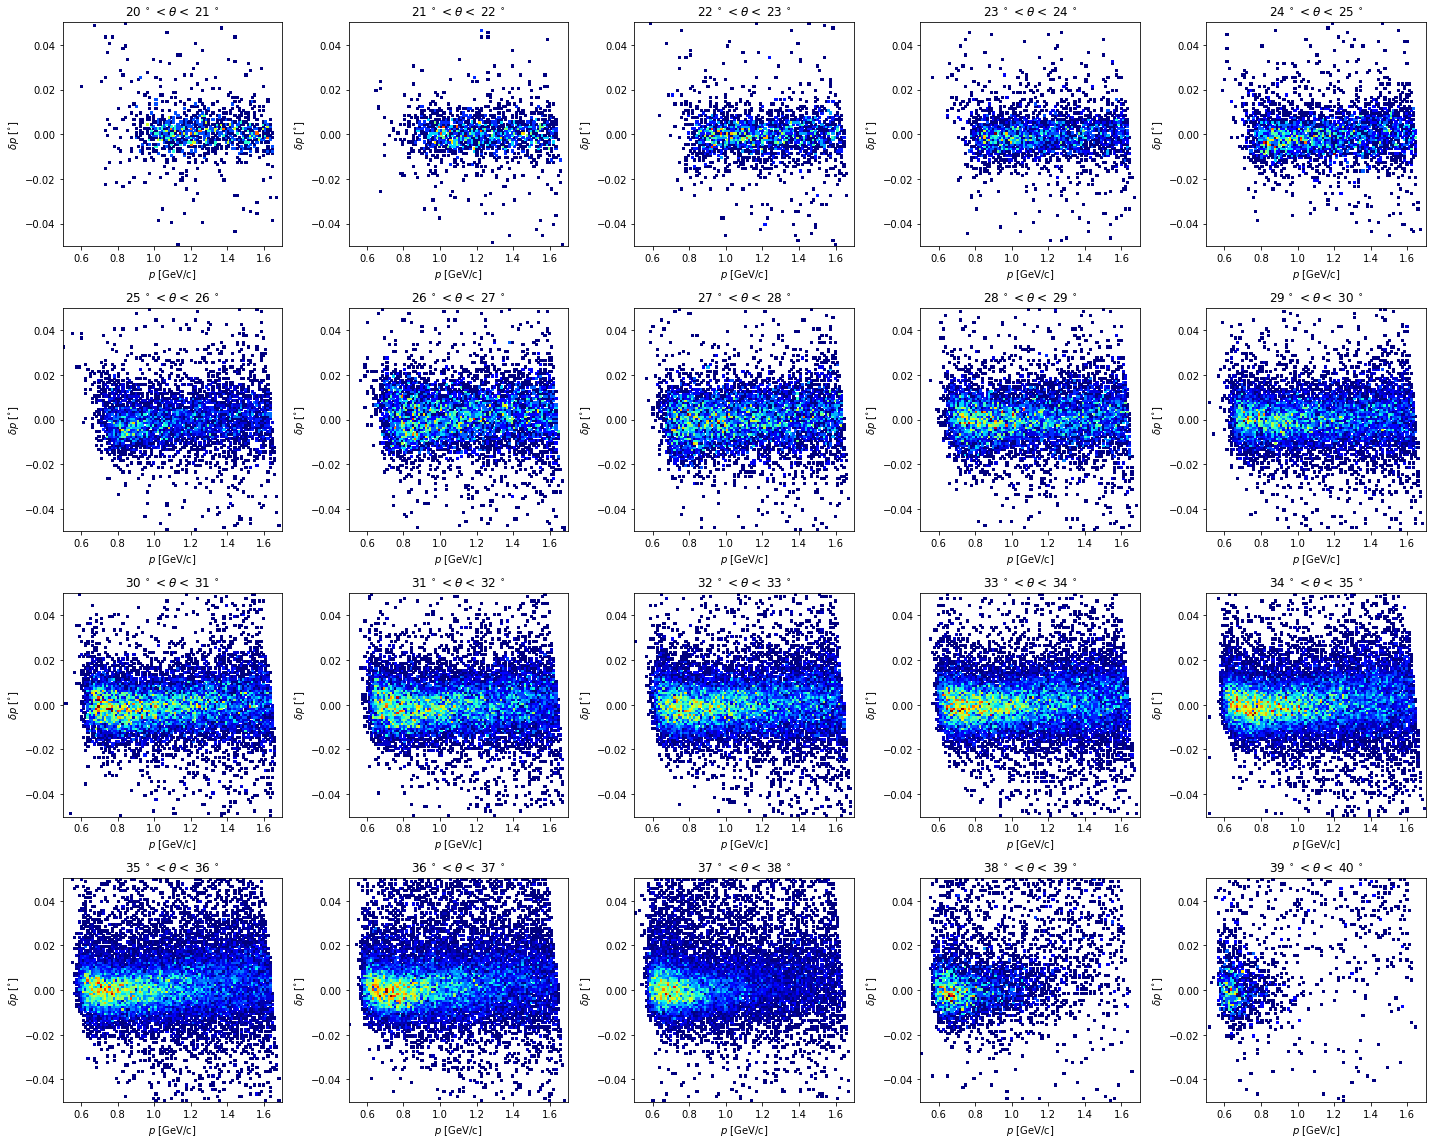

In [136]:
fig, axs = plt.subplots(4,5, figsize=(20,16))
for row in range(4):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (df_protonRec.Ptheta >= ind+20) & (df_protonRec.Ptheta < ind+21)
        axs[row, col].hist2d(df_protonRec.loc[thetaCond, "Pp"], df_protonRec.loc[thetaCond, "GenPp"] - df_protonRec.loc[thetaCond, "Pp"], bins = [np.linspace(0.5, 1.7, 101), np.linspace(-0.05, 0.05, 101)], cmap = cmap, cmin =1)
        param = params_p[ind]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.5, 1.7, 51), correction(param, np.linspace(0.5, 1.7, 51)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta p$" + " ["+degree+"]")
        axs[row, col].set_title(str(ind+20)+" "+degree + r" $<\theta<$ " + str(ind+21)+" "+degree)
plt.tight_layout()
plt.show()
# plt.savefig("correction_p_result.pdf")

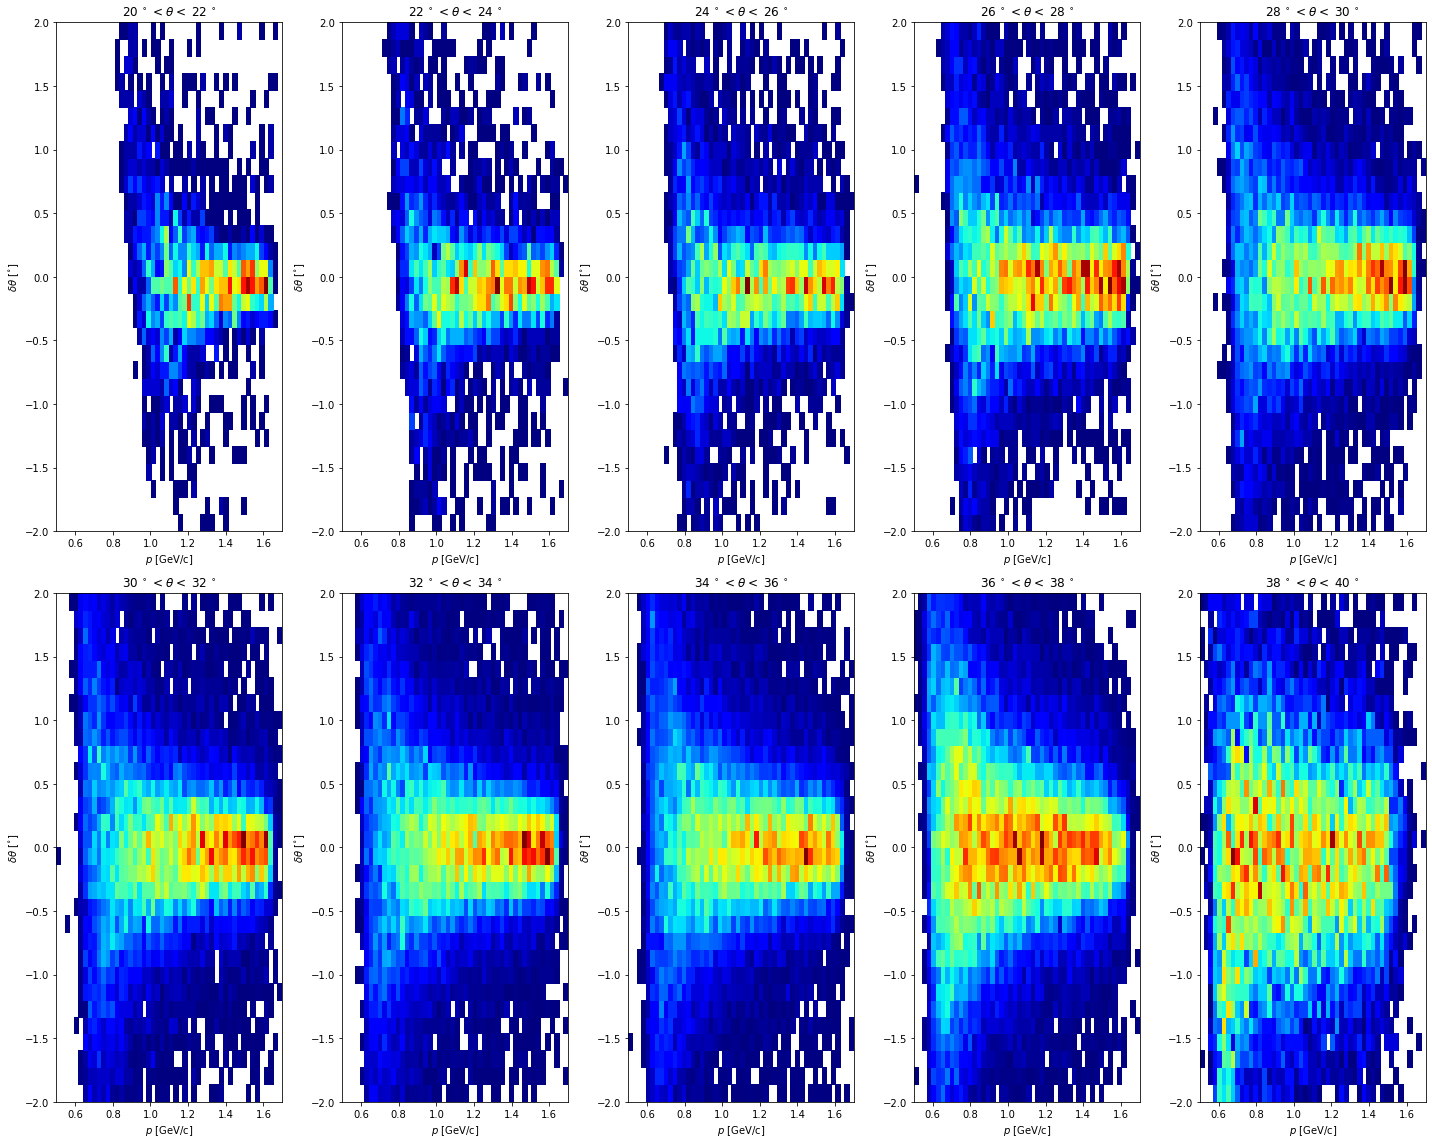

In [134]:
fig, axs = plt.subplots(2,5, figsize=(20,16))
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (df_protonRec.Ptheta >= 2*ind+20) & (df_protonRec.Ptheta < 2*ind+22)
        axs[row, col].hist2d(df_protonRec.loc[thetaCond, "Pp"], df_protonRec.loc[thetaCond, "GenPtheta"] - df_protonRec.loc[thetaCond, "Ptheta"], bins = [np.linspace(0.5, 1.7, 51), np.linspace(-2, 2, 31)], cmap = cmap, cmin =1)
        param = params_theta[ind]
#         param = [0, -8, -3 ]
#         if ind == 11:
#             param = params[10]
#         axs[row, col].plot(np.linspace(0.5, 1.7, 101), correction4([0, -2, -3], np.linspace(0.5, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].plot(np.linspace(0.5, 1.7, 101), correction4(param, np.linspace(0.5, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta \theta$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+20)+" "+degree + r" $<\theta<$ " + str(2*ind+22)+" "+degree)
plt.tight_layout()
plt.show()
# plt.savefig("correction_p_result.pdf")

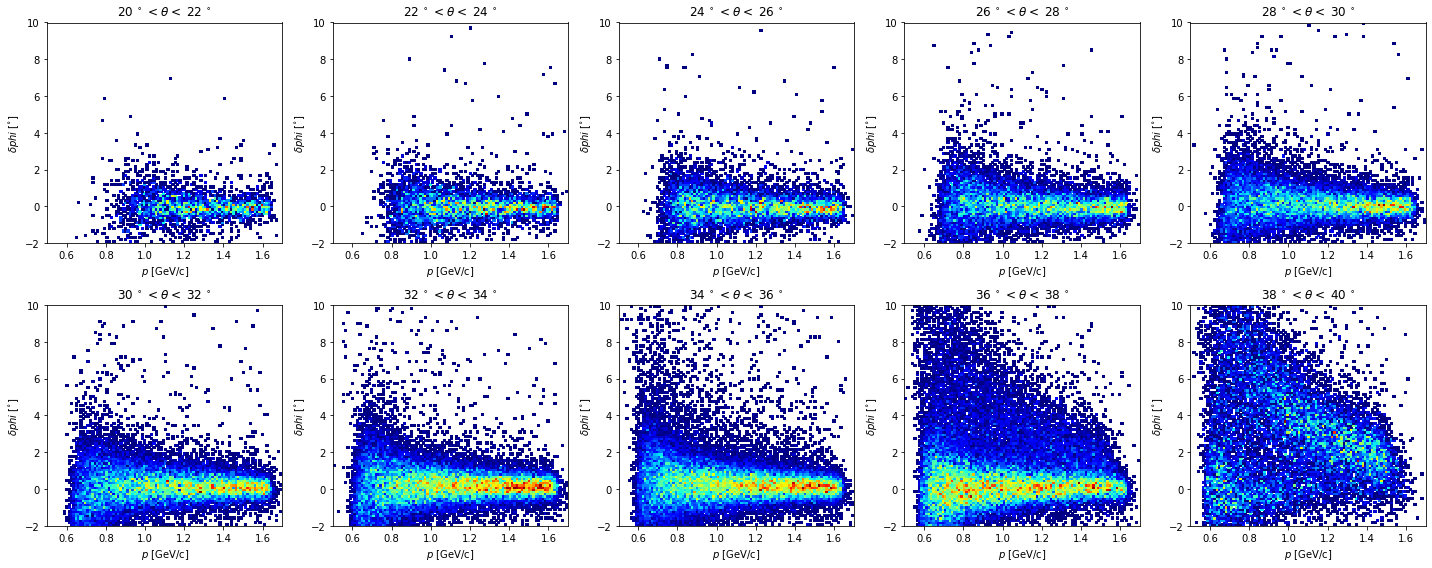

In [137]:
fig, axs = plt.subplots(2,5, figsize=(20,8))
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (df_protonRec.Ptheta >= 2*ind+20) & (df_protonRec.Ptheta < 2*ind+22)
        axs[row, col].hist2d(df_protonRec.loc[thetaCond, "Pp"], df_protonRec.loc[thetaCond, "GenPphi"] - df_protonRec.loc[thetaCond, "Pphi"], bins = [np.linspace(0.5, 1.7, 101), np.linspace(-2, 10, 101)], cmap = cmap, cmin =1)
        param = params_phi[ind]
#         if ind == 11:
#             param = params[10]
#        axs[row, col].plot(np.linspace(0.5, 1.7, 101), correction4(param, np.linspace(0.5, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+20)+" "+degree + r" $<\theta<$ " + str(2*ind+22)+" "+degree)
plt.tight_layout()
plt.show()
# plt.savefig("correction_p_result.pdf")

In [ ]:
fig, axs = plt.subplots(2,5, figsize=(20,8))
for row in range(2):
    for col in range(5):
        ind =col+5*row
#         axs[row, col].hist(dfn[ind].loc[:, "Ptheta"])
        thetaCond = (job3111FD.Ptheta >= 2*ind+20) & (job3111FD.Ptheta < 2*ind+22)
        axs[row, col].hist2d(job3111FD.loc[thetaCond, "Pp"], job3111FD.loc[thetaCond, "GenPphi"] - job3111FD.loc[thetaCond, "Pphi"], bins = [np.linspace(0.5, 1.7, 101), np.linspace(-2, 10, 101)], cmap = cmap, cmin =1)
        param = params_phi[ind]
#         if ind == 11:
#             param = params[10]
        axs[row, col].plot(np.linspace(0.5, 1.7, 101), correction4(param, np.linspace(0.5, 1.7, 101)), color='k', linewidth=2, linestyle='--')
#         axs[row, col].set_xlim(0.3, 1.2)
        axs[row, col].set_xlabel(r"$p$" + " ["+GeVc+"]")
        axs[row, col].set_ylabel(r"$\delta phi$" + " ["+degree+"]")
        axs[row, col].set_title(str(2*ind+20)+" "+degree + r" $<\theta<$ " + str(2*ind+22)+" "+degree)
plt.tight_layout()
plt.show()
# plt.savefig("correction_p_result.pdf")

In [85]:
job3111CD = job3111[job3111.Psector>7]

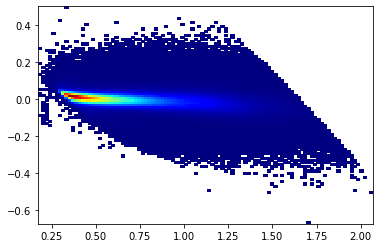

In [42]:
plt.hist2d(job3111CD.Pp, job3111CD.GenPp - job3111CD.Pp, bins = 101, cmap = cmap, cmin =1)
plt.show()

<AxesSubplot:>

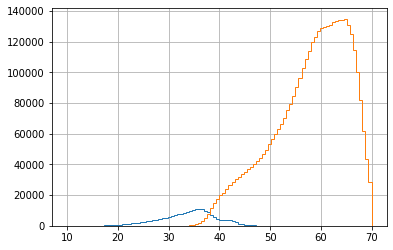

In [48]:
job3111FD.Ptheta.hist(bins = np.linspace(10,70, 101),histtype='step')
job3111CD.Ptheta.hist(bins = np.linspace(10,70, 101),histtype='step')